In [2]:
# Laurie
# Import Libraries
import matplotlib
matplotlib.use('TkAgg')
from matplotlib import rc
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import scipy
from scipy import ndimage
from matplotlib.lines import Line2D
from pylab import *
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from numpy import histogram2d as histogram2d
from numpy import sqrt, pi, exp, loadtxt
from lmfit import Model
from matplotlib.colors import LogNorm
from matplotlib import contour
from copy import deepcopy

In [3]:
# Read data

dis = fits.open('NGC628_distance_grow.fits')
dis.info()
d = dis[0].data
dis.close()

limm = fits.open('NGC628_dimension_regions.fits')
limm.info()
lim = limm[0].data
limm.close()


# Read Fits Data and Data Header
ahdu_list1 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits')
ahdu_list1.info()
aimage_dataha = ahdu_list1[0].data
ahdu_list1.close()

ahdu_list2 = fits.open('NGC628_SN3_1.0.LineMaps.map.6583.amplitude.clean.fits')
ahdu_list2.info()
aimage_datan2 = ahdu_list2[0].data
ahdu_list2.close()

ahdu_list3 = fits.open('NGC628_SN3_1.0.LineMaps.map.6548.amplitude.clean.fits')
ahdu_list3.info()
aimage_datan21 = ahdu_list3[0].data
ahdu_list3.close()

fhdu_list1 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.fwhm.clean.fits')
fhdu_list1.info()
fimage_dataha = fhdu_list1[0].data
fhdu_list1.close()

fhdu_list2 = fits.open('NGC628_SN3_1.0.LineMaps.map.6583.fwhm.clean.fits')
fhdu_list2.info()
fimage_datan2 = fhdu_list2[0].data
fhdu_list2.close()

fhdu_list3 = fits.open('NGC628_SN3_1.0.LineMaps.map.6548.fwhm.clean.fits')
fhdu_list3.info()
fimage_datan21 = fhdu_list3[0].data
fhdu_list3.close()
                    
s = fits.open('stars.fits')
s.info()
image_s = s[0].data
s.close()
aimage_datan2[np.where(aimage_datan2 < 0)] = 0
aimage_datan21[np.where(aimage_datan21 < 0)] = 0
fimage_datan2[np.where(aimage_datan2 < 0)] = 0
fimage_datan21[np.where(aimage_datan21 < 0)] = 0
                       
image_data = (((aimage_datan2*fimage_datan2)+(aimage_datan21*fimage_datan21))/(1.339*aimage_dataha*fimage_dataha))
#image_data[(aimage_dataha >= 1.2e-18) & (image_data == 0)] = 0.001
image_data = np.log10(image_data)
#image_data[np.where(aimage_dataha < 1.2e-18)] = 500
image_data[np.where(np.isfinite(image_data) == False)] = 500
image_data[np.where(image_s == 1)] = 500
image_data[np.where(image_data == 0)] = 500
n2h = image_data

# Read Fits Data and Data Header
ahdu_list1 = fits.open('NGC628_SN2_1.0.LineMaps.map.5007.amplitude.clean.int3.fits')
ahdu_list1.info()
aimage_datao3 = ahdu_list1[0].data
ahdu_list1.close()

ahdu_list2 = fits.open('NGC628_SN2_1.0.LineMaps.map.4861.amplitude.clean.int3.fits')
ahdu_list2.info()
aimage_datahb = ahdu_list2[0].data
ahdu_list2.close()

ahdu_list3 = fits.open('NGC628_SN2_1.0.LineMaps.map.4959.amplitude.clean.int3.fits')
ahdu_list3.info()
aimage_datao31 = ahdu_list3[0].data
ahdu_list3.close()

fhdu_list1 = fits.open('NGC628_SN2_1.0.LineMaps.map.5007.fwhm.clean.int3.fits')
fhdu_list1.info()
fimage_datao3 = fhdu_list1[0].data
fhdu_list1.close()

fhdu_list2 = fits.open('NGC628_SN2_1.0.LineMaps.map.4861.fwhm.clean.int3.fits')
fhdu_list2.info()
fimage_datahb = fhdu_list2[0].data
fhdu_list2.close()

fhdu_list3 = fits.open('NGC628_SN2_1.0.LineMaps.map.4959.fwhm.clean.int3.fits')
fhdu_list3.info()
fimage_datao31 = fhdu_list3[0].data
fhdu_list3.close()
                    

s = fits.open('stars.fits')
s.info()
image_s = s[0].data
s.close()
aimage_datao3[np.where(aimage_datao3 < 0)] = 0
aimage_datahb[np.where(aimage_datahb < 0)] = 0
fimage_datao3[np.where(fimage_datao3 < 0)] = 0
fimage_datahb[np.where(fimage_datahb < 0)] = 0
aimage_datao31[np.where(aimage_datao31 < 0)] = 0
fimage_datao31[np.where(fimage_datao31 < 0)] = 0
                       
image_data = (((aimage_datao3*fimage_datao3)+(aimage_datao31*fimage_datao31))/(1.333*aimage_datahb*fimage_datahb))
#image_data[(aimage_datahb >= 4e-19) & (image_data == 0)] = 0.000001
image_data = np.log10(image_data)
#image_data[(aimage_datahb < 5.5e-19) & (aimage_datao3 < 5.5e-19)] = 500
image_data[np.where(np.isfinite(image_data) == False)] = 500
image_data[np.where(image_s == 1)] = 500
#image_data[(image_data > 1.5) & (image_data < 499)] = 5
o3h = image_data

Filename: NGC628_distance_grow.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       9   (2048, 2064)   float32   
Filename: NGC628_dimension_regions.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       5   (4285,)      float64   
Filename: NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6583.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6548.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6563.fwhm.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PR

Filename: NGC628_SN2_1.0.LineMaps.map.5007.amplitude.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.4861.amplitude.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.4959.amplitude.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.5007.fwhm.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.4861.fwhm.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.4959.fwhm.clean.i

In [4]:
lim = fits.getdata('NGC628_dimension_regions.fits')
print len(lim)

gr= fits.open('NGC628_HIIPhot3_All_GROW.fits')
gr.info()
grow = gr[0].data
gr.close()


4285
Filename: NGC628_HIIPhot3_All_GROW.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   


In [5]:
r= fits.open('NGC628_SITELLE_rayon_pc_carte.fits')
r.info()
ra = r[0].data
r.close()

Filename: NGC628_SITELLE_rayon_pc_carte.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   


In [6]:
fn2h = n2h
fo3h = o3h
fn2h[(aimage_dataha < 1.2e-18) & (aimage_datan2 < 1.0e-18)] = -3
fo3h[(aimage_datao3 < 0.6e-18) & (aimage_datahb < 0.6e-18)] = -5
fn2h[(fn2h == 0)] = -3
fo3h[(fo3h == 0)] = -5

In [7]:
med = fits.getdata('NGC628_background.regions.fits')
grow2 = grow
for i in range(0,np.max(grow)):
    grow2[(grow == i+1)] = med[i]
gr= fits.open('NGC628_HIIPhot3_All_GROW.fits')
gr.info()
grow = gr[0].data
gr.close()


Filename: NGC628_HIIPhot3_All_GROW.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   


In [129]:
ffn2h = np.array(len(n2h[(n2h > -3) & (o3h > -5)]) & (fn2h < 500) & (fo3h < 500))
ffo3h = np.array(len(n2h[(n2h > -3) & (o3h > -5)]) & (fn2h < 500) & (fo3h < 500))
rr = np.array(len(n2h[(n2h > -3) & (o3h > -5)]) & (fn2h < 500) & (fo3h < 500))
dd = np.array(len(n2h[(n2h > -3) & (o3h > -5)]) & (fn2h < 500) & (fo3h < 500))
#for i in range(0,len(n2h[(n2h > -3) & (o3h > -5)])) :
ffn2h = fn2h[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)]
ffo3h = fo3h[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)]
rr = ra[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)]
dd = d[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)]
flu = (1.20671*10*aimage_dataha[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)]*\
    fimage_dataha[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)])
fflu = flu - grow2[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)]

<IPython.core.display.Javascript object>


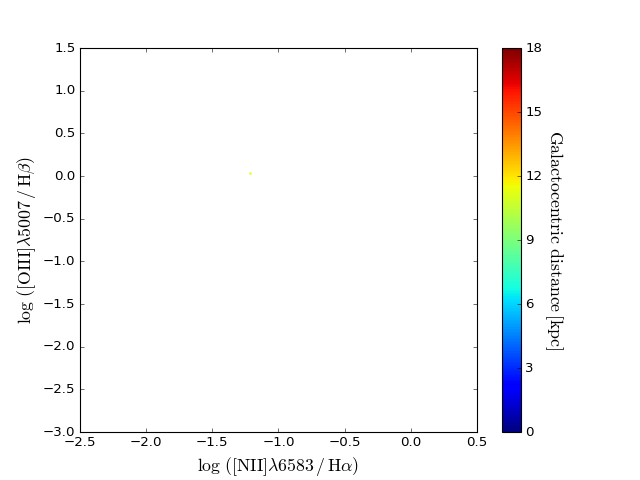

In [133]:
%matplotlib nbagg
fig = plt.figure(figsize=(11.25,11.6))
ax1 = fig.add_subplot(111)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    length=10,
    width=2,
    top='on',         # ticks along the top edge are off
    labelbottom='off', # labels along the bottom edge are off
    labelleft='off') # labels along the bottom edge are off

h=5e-17
plt.scatter(ffn2h[(dd < 150) & (fflu > h)], ffo3h[(dd < 150) & (fflu > h)], marker='.', c=rr[(dd < 150) & (fflu > h)]/1000, linewidths = 0.0)
# Show the boundary between the regions:
plt.plot(np.arange(160.)/40-3, 0.61/(np.arange(160.)/40-3.05) + 1.3, linestyle='--', c='k')
plt.plot(np.arange(135.)/40-3, 0.61/(np.arange(135.)/40-3.47) + 1.19, c='k')


#cbar=plt.colorbar(ticks=[0,3,6,9,12,15,18],pad=0.05)
#cbar.set_label('$\mathrm{Galactocentric\,\,distance\,[pc]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(0,18)

#plt.xlabel('$\mathrm{log\,\,[NII]\lambda6583\,/\,H}$'+r'$\mathrm{\alpha}$', fontsize=16, fontname = 'Helvetica')
#plt.ylabel('$\mathrm{log\,\,[OIII]\lambda5007\,/\,H}$'+r'$\mathrm{\beta}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(-2.5,0.5)
plt.ylim(-3,1.5)
plt.show()

In [134]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_distance_gal.eps')
plt.savefig('NGC628_BPT_distance_gal_t.png', transparent=False, bbox_inches='tight', pad_inches=0.04)

#fn2h = n2h
#fo3h = o3h
#fn2h[(aimage_dataha < 1.8e-18) & (aimage_datan2 < 1.0e-18)] = -3
#fo3h[(aimage_datao3 < 0.8e-18) & (aimage_datahb < 0.8e-18)] = -5
#fn2h[(fn2h == 0)] = -3
#fo3h[(fo3h == 0)] = -5
#
#ffn2h = np.array(len(n2h[(n2h > -3) & (o3h > -5)]) & (fn2h < 500) & (fo3h < 500))
#ffo3h = np.array(len(n2h[(n2h > -3) & (o3h > -5)]) & (fn2h < 500) & (fo3h < 500))
#rr = np.array(len(n2h[(n2h > -3) & (o3h > -5)]) & (fn2h < 500) & (fo3h < 500))
#dd = np.array(len(n2h[(n2h > -3) & (o3h > -5)]) & (fn2h < 500) & (fo3h < 500))
#
#fffn2h = fn2h
#fffo3h = fo3h
#
#for i in range(0,len(lim)) :
#    fffn2h[(grow == i+1) & (d > lim[i])] = -3
#    fffo3h[(grow == i+1) & (d > lim[i])] = -5
#    
##for i in range(0,len(n2h[(n2h > -3) & (o3h > -5)])) :
#ffn2h = fn2h[(fffn2h > -3) & (fffo3h > -5) &(fffn2h < 500) & (fffo3h < 500)]
#ffo3h = fo3h[(fffn2h > -3) & (fffo3h > -5) &(fffn2h < 500) & (fffo3h < 500)]
#rr = ra[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)]
#dd = d[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)]
#flu = (1.20671*10*aimage_dataha[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)]*\
#    fimage_dataha[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)])
#fflu = flu - grow2[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)]
#

In [13]:
flux_tot = fits.getdata('NGC628_flux_tot_regions.fits')

In [10]:
fffffo3h = deepcopy(ffo3h)
fffffn2h = deepcopy(ffn2h)
for i in range(0,1000) :
    fffffo3h[i]=0.6
    fffffn2h[i]=-2.5
for i in range(1000,2000) :
    fffffo3h[i]=-1.5
    fffffn2h[i]=-0.6
for i in range(2000,4000) :
    fffffo3h[i]=-2.36
    fffffn2h[i]=-0.58

for i in range(4000,6000) :
    fffffo3h[i]=-3
    fffffn2h[i]=-0.65


y=np.polyfit(fffffo3h[(dd < 150) & (ffn2h < 0) & (ffn2h > -3) & (ffo3h < 1) & (ffo3h > -5)& (np.log10(fflu) > -15.87)],fffffn2h[(dd < 150) & (ffn2h <0) & (ffn2h > -3) & (ffo3h <1) & (ffo3h > -5)& (np.log10(fflu) > -15.87)],4)
print y
yy = np.poly1d(y)
print yy

[-0.06374058 -0.42192536 -0.89519307 -0.64644735 -0.68470291]
          4          3          2
-0.06374 x - 0.4219 x - 0.8952 x - 0.6464 x - 0.6847


<IPython.core.display.Javascript object>


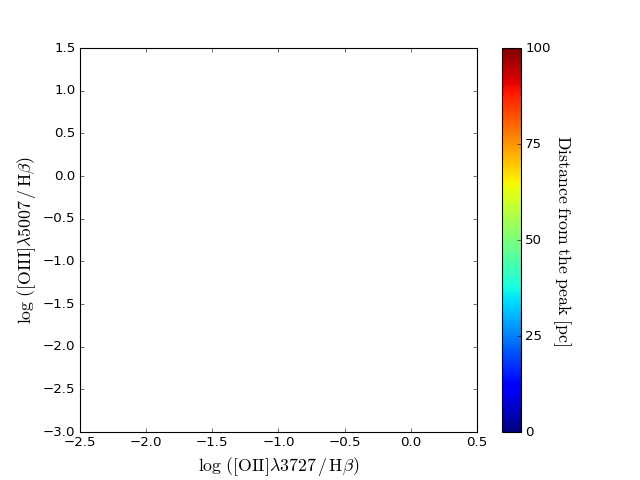

In [142]:
%matplotlib nbagg

cmin = 0
cmax = 100
#i=381
#for j in range(0,len(np.where((flux_tot > 4e-14) == True)[0])) :
#    print j
#    
#    col = np.zeros(len(np.where(grow == np.where((flux_tot > 4e-14) == True)[0][j]+1)[0]))
#    row = np.zeros(len(np.where(grow == np.where((flux_tot > 4e-14) == True)[0][j]+1)[0]))
#    
#    for i in range(0,len(np.where(grow == np.where((flux_tot > 4e-14) == True)[0][j]+1)[0])) : 
#    
#        col = np.where(grow == np.where((flux_tot > 4e-14) == True)[0][j]+1)[0][0:]
#        row = np.where(grow == np.where((flux_tot > 4e-14) == True)[0][j]+1)[1][0:]
#    
#    plt.scatter(fn2h[col,row], fo3h[col,row], marker='.', c=d[col,row], linewidths = 0.25, alpha = 0.50)
#

#for i in range(302,303) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
#    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 0.25)
#    plt.clim(cmin,cmax)



#for i in range(305,306) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
#    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
#    plt.clim(cmin,cmax)
    
    
#for i in range(106,107) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
#    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 0.25)
#    plt.clim(cmin,cmax)
    
#for i in range(178,179) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
##    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
 #   plt.clim(cmin,cmax)
    
    
#for i in range(248,249) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
#    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
#    plt.clim(cmin,cmax)
    
#plt.scatter(fn2h[(grow == 4210) & (d < mm)], fo3h[(grow == 4210) & (d < mm)], marker='.', c=d[(grow == 4210) & (d < mm)], linewidths = 0.0, alpha = 1)
#plt.clim(cmin,cmax)
m = 5e-15
#mm=150
#
#for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
##for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
#    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
#    plt.clim(cmin,cmax)
#    
#mm=125
#
#for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
##for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
#    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
#    plt.clim(cmin,cmax)
#
mm=100

#for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
    #plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
    #plt.clim(cmin,cmax)
    
mm = 75

#for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
    #plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
    #plt.clim(cmin,cmax)

mm=50

#for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
    #plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
    #plt.clim(cmin,cmax)
    
mm=25

#for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
    #plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
    #plt.clim(cmin,cmax)

    
mm=15

#for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
    #plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
    #plt.clim(cmin,cmax)
    
    
mm=5

#for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
plt.scatter(fn2h[0], fo3h[0], marker='.', c=d[0], linewidths = 0.0, alpha = 1)
    #plt.clim(cmin,cmax)
    
    
# Show the boundary between the regions:
#plt.plot(np.arange(160.)/40-3, 0.61/(np.arange(160.)/40-3.05) + 1.3, linestyle='--', c='k')
#plt.plot(np.arange(135.)/40-3, 0.61/(np.arange(135.)/40-3.47) + 1.19, c='k')
#plt.plot(yy(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')

#plt.plot(np.arange(105.)/40-3, 0.15/(np.arange(105.)/40-2.6) + 0.55, c='k')

cbar=plt.colorbar(ticks=[0,25,50,75,100,125,150,175,200],pad=0.05)
#cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
cbar.set_label('$\mathrm{Distance\,\,from\,\,the\,\,peak\,\,[pc]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
plt.xlabel('$\mathrm{log\,\,([OII]\lambda3727\,/\,H}$'+r'$\mathrm{\beta})$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,([OIII]\lambda5007\,/\,H}$'+r'$\mathrm{\beta})$', fontsize=16, fontname = 'Helvetica')
#plt.plot(yy(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')
plt.xlim(-2.5,0.5)
plt.ylim(-3,1.5)
plt.show()

In [143]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_distance_peak.eps')
plt.savefig('NGC628_BPT_flux_OII_peak_tt.pdf', transparent=True, bbox_inches='tight', pad_inches=0.04)


In [110]:
print d[0]

[ 0.  0.  0. ...,  0.  0.  0.]


<IPython.core.display.Javascript object>


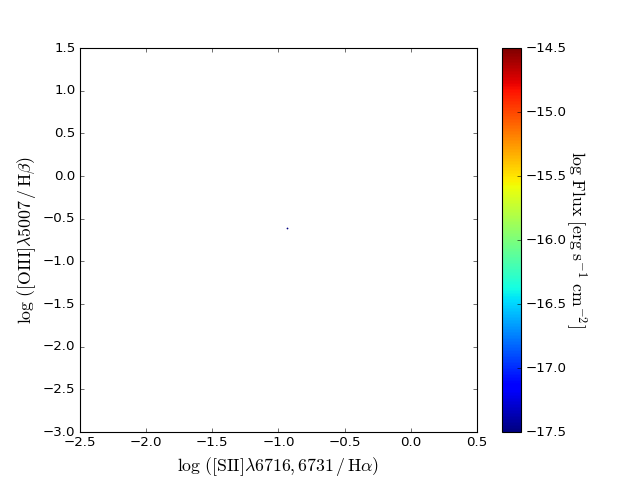

In [138]:
%matplotlib nbagg

cmin = -14.5
cmax = -17.5

plt.scatter(ffn2h[(np.log10(fflu) < -17.599) & (np.log10(fflu) > -17.6)], ffo3h[(np.log10(fflu) < -17.599) & (np.log10(fflu) > -17.6)], marker='.', c=np.log10(fflu[(np.log10(fflu) < -17.599) & (np.log10(fflu) > -17.6)]), linewidths = 0.0, s = 10)
    #plt.clim(cmin,cmax)
    
    
# Show the boundary between the regions:
#plt.plot(np.arange(160.)/40-3, 0.61/(np.arange(160.)/40-3.05) + 1.3, linestyle='--', c='k')
#plt.plot(np.arange(135.)/40-3, 0.61/(np.arange(135.)/40-3.47) + 1.19, c='k')
#plt.plot(yy(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')

#plt.plot(np.arange(105.)/40-3, 0.15/(np.arange(105.)/40-2.6) + 0.55, c='k')

#cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)

cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16,-15.5,-15,-14.5],pad=0.05)
cbar.set_label('$\mathrm{log\,\,Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.xlabel('$\mathrm{log\,\,([SII]\lambda6716,6731\,/\,H}$'+r'$\mathrm{\alpha})$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,([OIII]\lambda5007\,/\,H}$'+r'$\mathrm{\beta})$', fontsize=16, fontname = 'Helvetica')
#plt.plot(yy(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')
plt.xlim(-2.5,0.5)
plt.ylim(-3,1.5)
plt.show()





In [139]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_distance_peak.eps')
plt.savefig('NGC628_BPT_distance_flux_SII_tt.pdf', transparent=True, bbox_inches='tight', pad_inches=0.04)

<IPython.core.display.Javascript object>


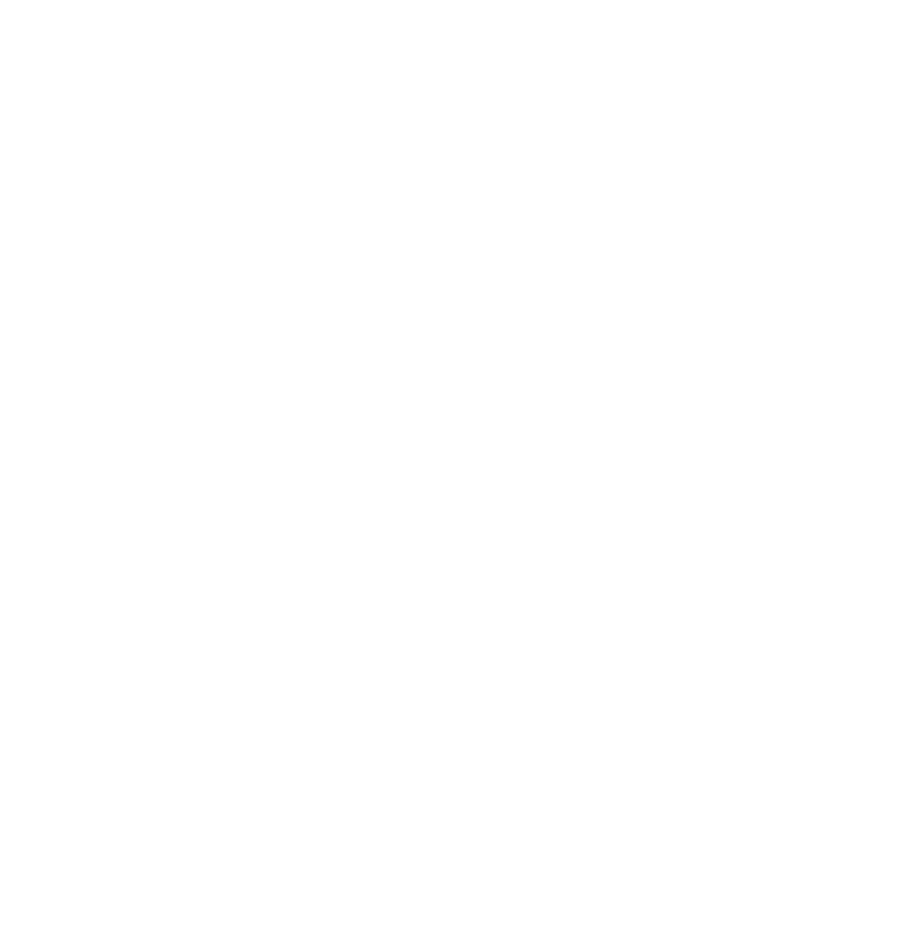

KeyboardInterrupt: 

In [50]:
%matplotlib nbagg

cmin = 0
cmax = 100
#i=381
#for j in range(0,len(np.where((flux_tot > 4e-14) == True)[0])) :
#    print j
#    
#    col = np.zeros(len(np.where(grow == np.where((flux_tot > 4e-14) == True)[0][j]+1)[0]))
#    row = np.zeros(len(np.where(grow == np.where((flux_tot > 4e-14) == True)[0][j]+1)[0]))
#    
#    for i in range(0,len(np.where(grow == np.where((flux_tot > 4e-14) == True)[0][j]+1)[0])) : 
#    
#        col = np.where(grow == np.where((flux_tot > 4e-14) == True)[0][j]+1)[0][0:]
#        row = np.where(grow == np.where((flux_tot > 4e-14) == True)[0][j]+1)[1][0:]
#    
#    plt.scatter(fn2h[col,row], fo3h[col,row], marker='.', c=d[col,row], linewidths = 0.25, alpha = 0.50)
#

#for i in range(302,303) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
#    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 0.25)
#    plt.clim(cmin,cmax)



#for i in range(305,306) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
#    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
#    plt.clim(cmin,cmax)
    
    
#for i in range(106,107) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
#    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 0.25)
#    plt.clim(cmin,cmax)
    
#for i in range(178,179) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
##    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
 #   plt.clim(cmin,cmax)
    
    
#for i in range(248,249) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
#    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
#    plt.clim(cmin,cmax)
    
#plt.scatter(fn2h[(grow == 4210) & (d < mm)], fo3h[(grow == 4210) & (d < mm)], marker='.', c=d[(grow == 4210) & (d < mm)], linewidths = 0.0, alpha = 1)
#plt.clim(cmin,cmax)
m = 5e-16
#mm=150
#
#for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
##for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
#    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
#    plt.clim(cmin,cmax)
#    
#mm=125
#
#for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
##for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
#    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
#    plt.clim(cmin,cmax)
#
fig = plt.figure(figsize=(11.25,11.6))
ax1 = fig.add_subplot(111)

#ax1.axhline(y=1.499,linewidth=2, color="k")        # inc. width of x-axis and color it green
#ax1.axhline(y=-3.0,linewidth=2, color="k")        # inc. width of x-axis and color it green
#ax1.axvline(x=0.5,linewidth=2, color="k")
#ax1.axvline(x=-2.499,linewidth=2, color="k")
mm=100

for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
    plt.clim(cmin,cmax)
    
mm = 75

for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
    plt.clim(cmin,cmax)

mm=50

for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
    plt.clim(cmin,cmax)
    
mm=25

for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
    plt.clim(cmin,cmax)

    
mm=15

for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
    plt.clim(cmin,cmax)
    
    
mm=5

for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
    plt.clim(cmin,cmax)
    
    
# Show the boundary between the regions:
plt.plot(np.arange(160.)/40-3, 0.61/(np.arange(160.)/40-3.05) + 1.3, linestyle='--', c='k')
plt.plot(np.arange(135.)/40-3, 0.61/(np.arange(135.)/40-3.47) + 1.19, c='k')
#plt.plot(yy(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')

#plt.plot(np.arange(105.)/40-3, 0.15/(np.arange(105.)/40-2.6) + 0.55, c='k')

#cbar=plt.colorbar(ticks=[0,25,50,75,100,125,150,175,200],pad=0.05)
#cbar.set_label('$\mathrm{Angular\,\,distance\,\,from\,\,the\,\,peak\,\,[pc]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
#plt.clim(cmin,cmax)
#plt.xlabel('$\mathrm{log\,\,[NII]\lambda6583\,/\,H}$'+r'$\mathrm{\alpha}$', fontsize=16, fontname = 'Helvetica')
#plt.ylabel('$\mathrm{log\,\,[OIII]\lambda5007\,/\,H}$'+r'$\mathrm{\beta}$', fontsize=16, fontname = 'Helvetica')
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    length=10,
    width=2,
    top='on',         # ticks along the top edge are off
    labelbottom='off', # labels along the bottom edge are off
    labelleft='off') # labels along the bottom edge are off
plt.plot(yy(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')
plt.xlim(-2.5,0.5)
plt.ylim(-3,1.5)
plt.show()

In [68]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_distance_peak.eps')
plt.savefig('NGC628_BPT_distance_peak_t2.png', transparent=False, bbox_inches='tight', pad_inches=0)

In [ ]:
#%matplotlib nbagg
#
#cmin = 25
#cmax = 50
#
#
#plt.scatter(ffn2h[(dd > 50) & (dd < 75)], ffo3h[(dd > 50) & (dd < 75)], marker='.', c=dd[(dd > 50) & (dd < 75)], linewidths = 0.25, alpha = 0.50)
#plt.clim(cmin,cmax)
#plt.scatter(ffn2h[(dd > 25) & (dd < 50)], ffo3h[(dd > 25) & (dd < 50)], marker='.', c=dd[(dd > 25) & (dd < 50)], linewidths = 0.25, alpha = 0.50)
#plt.clim(cmin,cmax)
#plt.scatter(ffn2h[(dd > 0) & (dd < 25)], ffo3h[(dd > 0) & (dd < 25)], marker='.', c=dd[(dd > 0) & (dd < 25)], linewidths = 0.25, alpha = 0.50)
#plt.clim(cmin,cmax)
#
#
##plt.scatter(ffn2h[(dd > 75)& (dd < 100)], ffo3h[(dd > 75) & (dd < 100)], marker='.', c=dd[(dd > 75) & (dd < 100)], linewidths = 0.25, alpha = 0.80)
##plt.clim(cmin,cmax)
##plt.scatter(ffn2h[(dd > 100)& (dd < 125)], ffo3h[(dd > 100) & (dd < 125)], marker='.', c=dd[(dd > 100) & (dd < 125)], linewidths = 0.25, alpha = 0.80)
##plt.clim(cmin,cmax)
##plt.scatter(ffn2h[(dd > 125)& (dd < 150)], ffo3h[(dd > 125) & (dd < 150)], marker='.', c=dd[(dd > 125) & (dd < 150)], linewidths = 0.25, alpha = 0.80)
##plt.clim(cmin,cmax)
##plt.scatter(ffn2h[(dd > 150)& (dd < 175)], ffo3h[(dd > 150) & (dd < 175)], marker='.', c=dd[(dd > 150) & (dd < 175)], linewidths = 0.25, alpha = 0.80)
##plt.clim(cmin,cmax)
##plt.scatter(ffn2h[(dd > 175) & (dd < 200)], ffo3h[(dd > 175) & (dd < 200)], marker='.', c=dd[(dd > 175) & (dd < 200)], linewidths = 0.25, alpha = 0.80)
##plt.clim(cmin,cmax)
#
#
## Show the boundary between the regions:
#plt.plot(np.arange(160.)/40-3, 0.61/(np.arange(160.)/40-3.05) + 1.3, linestyle='--', c='k')
#plt.plot(np.arange(135.)/40-3, 0.61/(np.arange(135.)/40-3.47) + 1.19, c='k')
##plt.plot(np.arange(105.)/40-3, 0.15/(np.arange(105.)/40-2.6) + 0.55, c='k')
#
#cbar=plt.colorbar(ticks=[0,25,50,75,100,125,150,175,200],pad=0.1)
#cbar.set_label('$\mathrm{Angular\,\,distance\,\,from\,\,the\,\,peak\,\,[pc]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
#plt.clim(cmin,cmax)
#plt.xlabel('$\mathrm{log\,\,[NII]\lambda6583\,/\,H}$'+r'$\mathrm{\alpha}$', fontsize=16, fontname = 'Helvetica')
#plt.ylabel('$\mathrm{log\,\,[OIII]\lambda5007\,/\,H}$'+r'$\mathrm{\beta}$', fontsize=16, fontname = 'Helvetica')
#plt.xlim(-2.5,0.5)
#plt.ylim(-3.5,1.5)
#plt.show()

<IPython.core.display.Javascript object>


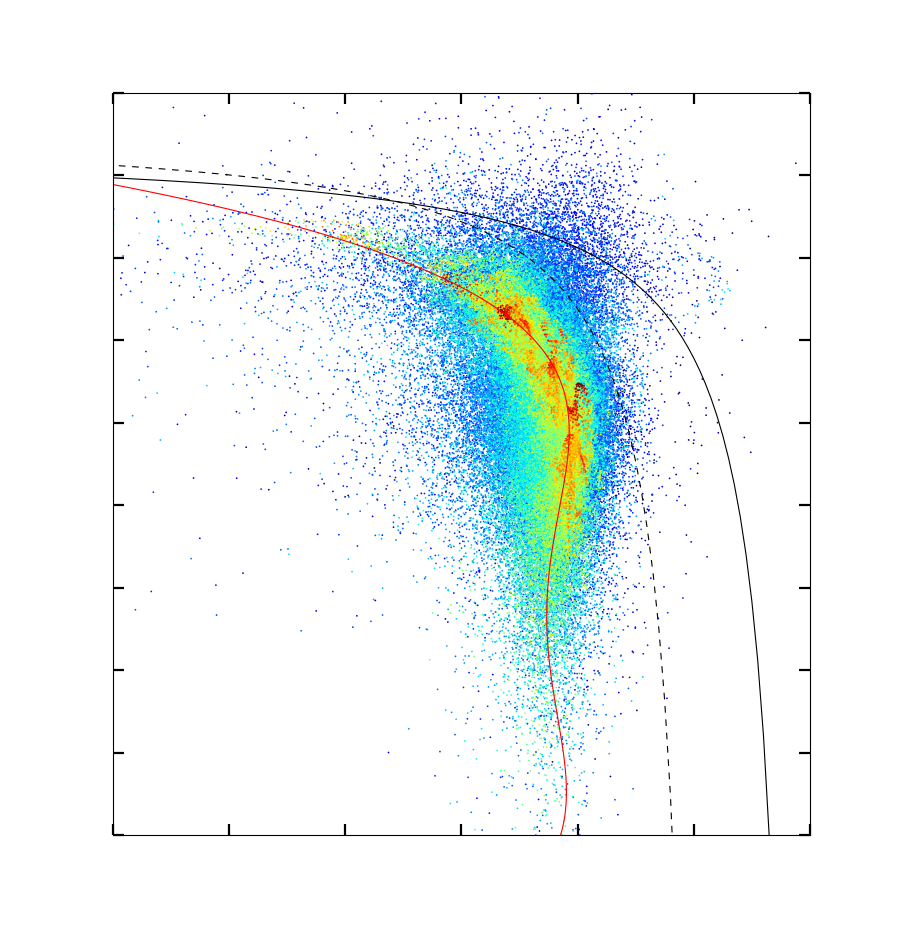

In [81]:
%matplotlib nbagg
fig = plt.figure(figsize=(11.25,11.6))
ax1 = fig.add_subplot(111)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    length=10,
    width=2,
    top='on',         # ticks along the top edge are off
    labelbottom='off', # labels along the bottom edge are off
    labelleft='off') # labels along the bottom edge are off
cmin = -17.5
cmax = -14.5
plt.scatter(ffn2h[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)], ffo3h[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)], marker='.', c=np.log10(fflu[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffn2h[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)], ffo3h[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)], marker='.', c=np.log10(fflu[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffn2h[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)], ffo3h[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)], marker='.', c=np.log10(fflu[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffn2h[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)], ffo3h[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)], marker='.', c=np.log10(fflu[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffn2h[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)], ffo3h[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)], marker='.', c=np.log10(fflu[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffn2h[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)], ffo3h[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)], marker='.', c=np.log10(fflu[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffn2h[(np.log10(fflu) > -15)], ffo3h[(np.log10(fflu) > -15)], marker='.', c=np.log10(fflu[(np.log10(fflu) > -15)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
plt.plot(np.arange(160.)/40-3, 0.61/(np.arange(160.)/40-3.05) + 1.3, linestyle='--', color='k')
plt.plot(np.arange(135.)/40-3, 0.61/(np.arange(135.)/40-3.47) + 1.19, color='k')
plt.plot(yy(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')


#cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.05)
#cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
#plt.clim(cmin,cmax)

#plt.xlabel('$\mathrm{log\,\,[NII]\lambda6583\,/\,H}$'+r'$\mathrm{\alpha}$', fontsize=16, fontname = 'Helvetica')
#plt.ylabel('$\mathrm{log\,\,[OIII]\lambda5007\,/\,H}$'+r'$\mathrm{\beta}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(-2.5,0.5)
plt.ylim(-3,1.5)
plt.show()

In [98]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_BPT_flux_t.pdf', transparent=False, bbox_inches='tight', pad_inches=0.0)

In [ ]:
np.arange(160.)/40-3, 0.61/(n2h)-3.05) + 1.3, linestyle='--', color='k')
np.arange(135.)/40-3, 0.61/(n2h)-3.47) + 1.19, color='k')
yy(o3h)

In [46]:
map = np.zeros([2064,2048])

map[(n2h > -3) & (o3h > -5) & (fn2h < 5000) & (fo3h < 5000)] = 1
map[(n2h > -3) & (o3h > -5) & (fn2h < 5000) & (fo3h < 5000) & (n2h > yy(o3h))] = 2
map[(n2h > -3) & (o3h > -5) & (fn2h < 5000) & (fo3h < 5000) & (o3h > 0.61/((n2h)-0.05) + 1.3)] = 3
map[(n2h > -3) & (o3h > -5) & (fn2h < 5000) & (fo3h < 5000) & (o3h > 0.61/((n2h)-0.47) + 1.19)] = 4

fits.writeto('test_map_pix.fits', map)

<IPython.core.display.Javascript object>


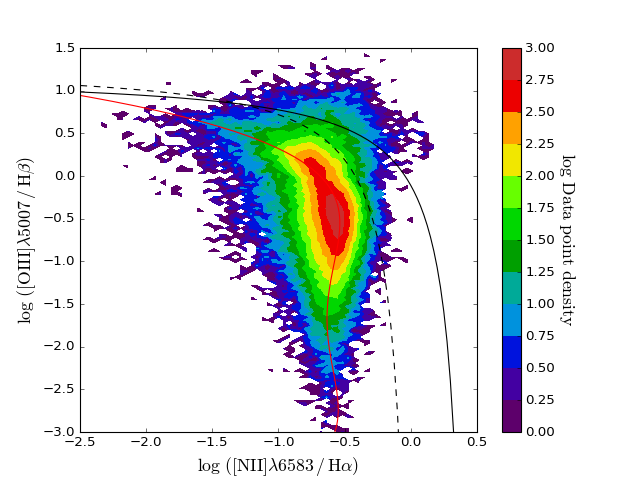

In [51]:
%matplotlib nbagg

fig=plt.figure()
ax = fig.add_subplot(111)
H, xedges, yedges = np.histogram2d(ffo3h[(dd < 200)], ffn2h[(dd < 200)],range=[[-3.5,1.5],[-2.5,0.5]], bins=(150,75))
extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
levels = (0,0.25,0.5,0.75,1,1.25,1.5,1.75, 2,2.25, 2.5,2.75, 3)
plt.contourf(np.log10(H), levels, extent=extent,cmap='nipy_spectral')
plt.xlim(-2.5,0.5)
plt.ylim(-3,1.5)
cbar=plt.colorbar(ticks=[0,0.25,0.5,0.75,1,1.25,1.5,1.75, 2,2.25, 2.5,2.75,3],pad=0.05)
cbar.set_label('$\mathrm{log\,\,Data\,\,point\,\,density}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(0,3)

plt.xlabel('$\mathrm{log\,\,([NII]\lambda6583\,/\,H}$'+r'$\mathrm{\alpha})$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,([OIII]\lambda5007\,/\,H}$'+r'$\mathrm{\beta})$', fontsize=16, fontname = 'Helvetica')

# Show the boundary between the regions:
plt.plot(np.arange(160.)/40-3, 0.61/(np.arange(160.)/40-3.05) + 1.3, linestyle='--', color='k')
plt.plot(np.arange(135.)/40-3, 0.61/(np.arange(135.)/40-3.47) + 1.19, color='k')
plt.plot(yy(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')
plt.show()

In [52]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_BPT_density.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

<IPython.core.display.Javascript object>


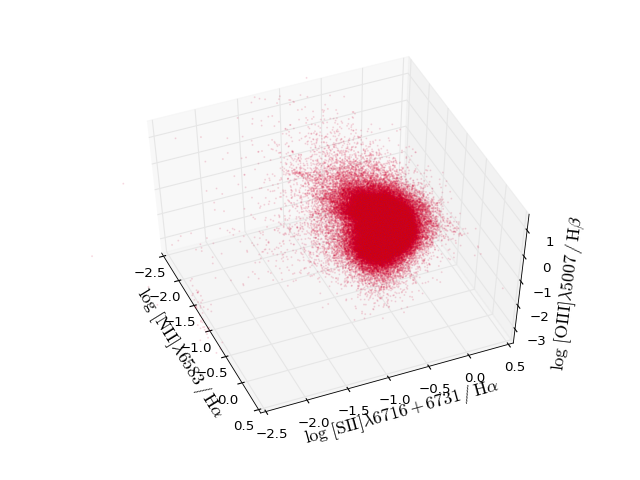

(-2.5, 0.5)

<IPython.core.display.Javascript object>


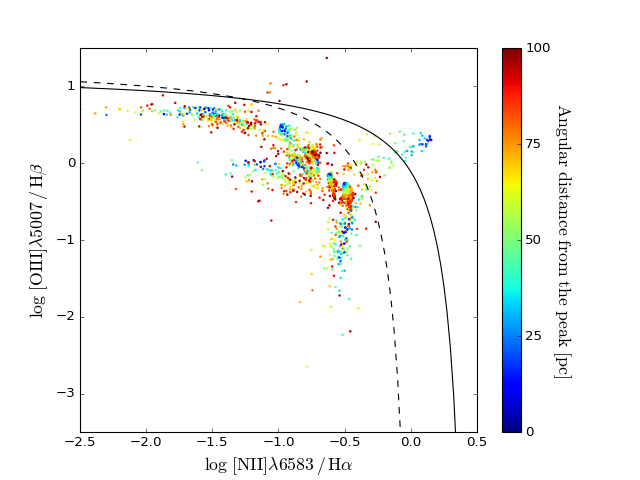

In [18]:
%matplotlib nbagg

cmin = 0
cmax = 100

m = 5e-15
mm=100

   
plt.scatter(fn2h[(grow == 1791) & (d < mm)], fo3h[(grow == 1791) & (d < mm)], marker='.', c=d[(grow == 1791) & (d < mm)], linewidths = 0.0, alpha = 1)
plt.clim(cmin,cmax)
plt.scatter(fn2h[(grow == 2220) & (d < mm)], fo3h[(grow == 2220) & (d < mm)], marker='.', c=d[(grow == 2220) & (d < mm)], linewidths = 0.0, alpha = 1)
plt.clim(cmin,cmax)
plt.scatter(fn2h[(grow == 2759) & (d < mm)], fo3h[(grow == 2759) & (d < mm)], marker='.', c=d[(grow == 2759) & (d < mm)], linewidths = 0.0, alpha = 1)
plt.clim(cmin,cmax)

    
# Show the boundary between the regions:
plt.plot(np.arange(160.)/40-3, 0.61/(np.arange(160.)/40-3.05) + 1.3, linestyle='--', c='k')
plt.plot(np.arange(135.)/40-3, 0.61/(np.arange(135.)/40-3.47) + 1.19, c='k')


cbar=plt.colorbar(ticks=[0,25,50,75,100,125,150,175,200],pad=0.05)
cbar.set_label('$\mathrm{Angular\,\,distance\,\,from\,\,the\,\,peak\,\,[pc]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
plt.xlabel('$\mathrm{log\,\,[NII]\lambda6583\,/\,H}$'+r'$\mathrm{\alpha}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,[OIII]\lambda5007\,/\,H}$'+r'$\mathrm{\beta}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(-2.5,0.5)
plt.ylim(-3.5,1.5)

i=2016
plt.scatter(fn2h[(grow == i) & (d < mm)], fo3h[(grow == i) & (d < mm)], marker='.', c=d[(grow == i) & (d < mm)], linewidths = 0.0, alpha = 1)
plt.clim(cmin,cmax)

#i=2019
#plt.scatter(fn2h[(grow == i) & (d < mm)], fo3h[(grow == i) & (d < mm)], marker='.', c=d[(grow == i) & (d < mm)], linewidths = 0.0, alpha = 1)
#plt.clim(cmin,cmax)


i=4210

plt.scatter(fn2h[(grow == i) & (d < mm)], fo3h[(grow == i) & (d < mm)], marker='.', c=d[(grow == i) & (d < mm)], linewidths = 0.0, alpha = 1)
plt.clim(cmin,cmax)


i=3179

plt.scatter(fn2h[(grow == i) & (d < mm)], fo3h[(grow == i) & (d < mm)], marker='.', c=d[(grow == i) & (d < mm)], linewidths = 0.0, alpha = 1)
plt.clim(cmin,cmax)


i=4040

plt.scatter(fn2h[(grow == i) & (d < mm)], fo3h[(grow == i) & (d < mm)], marker='.', c=d[(grow == i) & (d < mm)], linewidths = 0.0, alpha = 1)
plt.clim(cmin,cmax)
plt.show()


i=1775

plt.scatter(fn2h[(grow == i) & (d < mm)], fo3h[(grow == i) & (d < mm)], marker='.', c=d[(grow == i) & (d < mm)], linewidths = 0.0, alpha = 1)
plt.clim(cmin,cmax)
plt.show()


i=781

plt.scatter(fn2h[(grow == i) & (d < mm)], fo3h[(grow == i) & (d < mm)], marker='.', c=d[(grow == i) & (d < mm)], linewidths = 0.0, alpha = 1)
plt.clim(cmin,cmax)
plt.show()

i=4163

plt.scatter(fn2h[(grow == i) & (d < mm)], fo3h[(grow == i) & (d < mm)], marker='.', c=d[(grow == i) & (d < mm)], linewidths = 0.0, alpha = 1)
plt.clim(cmin,cmax)
plt.show()
i=960

plt.scatter(fn2h[(grow == i) & (d < mm)], fo3h[(grow == i) & (d < mm)], marker='.', c=d[(grow == i) & (d < mm)], linewidths = 0.0, alpha = 1)
plt.clim(cmin,cmax)
plt.show()
i=2214

plt.scatter(fn2h[(grow == i) & (d < mm)], fo3h[(grow == i) & (d < mm)], marker='.', c=d[(grow == i) & (d < mm)], linewidths = 0.0, alpha = 1)
plt.clim(cmin,cmax)
i=2191

plt.scatter(fn2h[(grow == i) & (d < mm)], fo3h[(grow == i) & (d < mm)], marker='.', c=d[(grow == i) & (d < mm)], linewidths = 0.0, alpha = 1)
plt.clim(cmin,cmax)
plt.show()
plt.show()

In [55]:
# Read Fits Data and Data Header

ahdu_list22 = fits.open('NGC628_SN3_1.0.LineMaps.map.6716.amplitude.clean.fits')
ahdu_list22.info()
aimage_datas21 = ahdu_list22[0].data
ahdu_list22.close()

ahdu_list33 = fits.open('NGC628_SN3_1.0.LineMaps.map.6731.amplitude.clean.fits')
ahdu_list33.info()
aimage_datas22 = ahdu_list33[0].data
ahdu_list33.close()

fhdu_list22 = fits.open('NGC628_SN3_1.0.LineMaps.map.6716.fwhm.clean.fits')
fhdu_list22.info()
fimage_datas21 = fhdu_list22[0].data
fhdu_list22.close()

fhdu_list33 = fits.open('NGC628_SN3_1.0.LineMaps.map.6731.fwhm.clean.fits')
fhdu_list33.info()
fimage_datas22 = fhdu_list33[0].data
fhdu_list33.close()
                    
aimage_datas21[np.where(aimage_datas21 < 0)] = 0
aimage_datas22[np.where(aimage_datas22 < 0)] = 0
fimage_datas21[np.where(aimage_datas21 < 0)] = 0
fimage_datas22[np.where(aimage_datas22 < 0)] = 0
                       
image_data = (((aimage_datas21*fimage_datas21)+(aimage_datas22*fimage_datas22))/(aimage_dataha*fimage_dataha))
#image_data[(aimage_dataha >= 1.2e-18) & (image_data == 0)] = 0.001
image_data = np.log10(image_data)
#image_data[np.where(aimage_dataha < 1.2e-18)] = 500
image_data[np.where(np.isfinite(image_data) == False)] = 500
image_data[np.where(image_s == 1)] = 500
image_data[np.where(image_data == 0)] = 500
s2h = image_data

Filename: NGC628_SN3_1.0.LineMaps.map.6716.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6731.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6716.fwhm.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6731.fwhm.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   


In [56]:
fs2h = deepcopy(s2h)
fs2h[(aimage_dataha < 1.2e-18) & (aimage_datas21 < 0.2e-18)] = -3
fs2h[(fs2h == 0)] = -3

ffs2h = np.array(len(s2h[(s2h > -3) & (o3h > -5)]) & (fs2h < 500) & (fo3h < 500))
ffo3hs = np.array(len(s2h[(s2h > -3) & (o3h > -5)]) & (fs2h < 500) & (fo3h < 500))
ffn2hs = np.array(len(s2h[(s2h > -3) & (o3h > -5)]) & (fs2h < 500) & (fo3h < 500))
rrs = np.array(len(s2h[(s2h > -3) & (o3h > -5)]) & (fs2h < 500) & (fo3h < 500))
dd = np.array(len(s2h[(s2h > -3) & (o3h > -5)]) & (fs2h < 500) & (fo3h < 500))

ffs2h = fs2h[(fs2h > -3) & (fo3h > -5) &(fs2h < 500) & (fo3h < 500)]
ffo3hs = fo3h[(fs2h > -3) & (fo3h > -5) &(fs2h < 500) & (fo3h < 500)]
ffn2hs = fn2h[(fs2h > -3) & (fo3h > -5) &(fs2h < 500) & (fo3h < 500)]

flus = (1.20671*10*aimage_dataha[(fs2h > -3) & (fo3h > -5) &(fs2h < 500) & (fo3h < 500)]*\
    fimage_dataha[(fs2h > -3) & (fo3h > -5) &(fs2h < 500) & (fo3h < 500)])
fflus = flus - grow2[(fs2h > -3) & (fo3h > -5) &(fs2h < 500) & (fo3h < 500)]

#fffffo3hs = deepcopy(ffo3hs)
#fffffs2h = deepcopy(ffs2h)
#for i in range(0,1000) :
#    fffffo3hs[i]=0.6
#    fffffs2h[i]=-2.5
#for i in range(1000,2000) :
#    fffffo3hs[i]=-1.5
#    fffffs2h[i]=-0.6
#for i in range(2000,4000) :
#    fffffo3hs[i]=-2.36
#    fffffs2h[i]=-0.58
#
#for i in range(4000,6000) :
#    fffffo3hs[i]=-3
#    fffffs2h[i]=-0.65


#ys=np.polyfit(fffffo3hs[(dd < 150) & (ffs2h < 0) & (ffs2h > -3) & (ffo3hs < 1) & (ffo3hs > -5)& (np.log10(fflus) > -15.87)],fffffs2h[(dd < 150) & (ffs2h <0) & (ffs2h > -3) & (ffo3hs <1) & (ffo3hs > -5)& (np.log10(fflus) > -15.87)],4)
#print ys
#yys = np.poly1d(ys)
#print yys


<IPython.core.display.Javascript object>


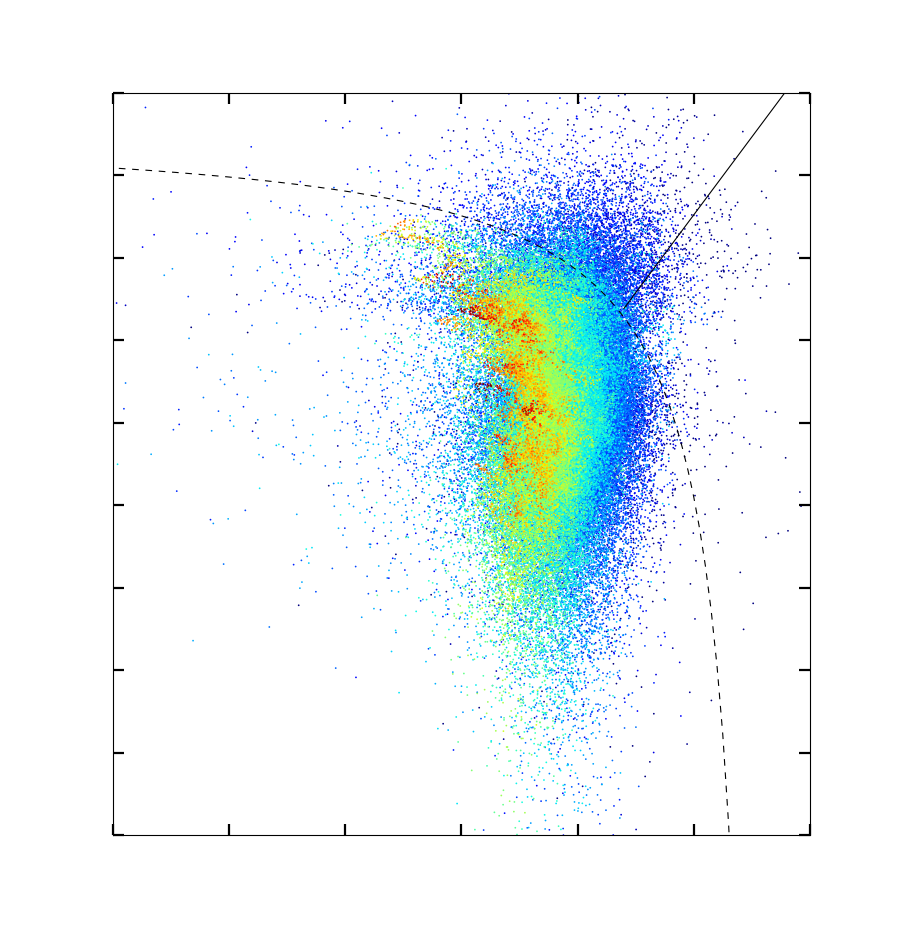

In [105]:
%matplotlib nbagg
fig = plt.figure(figsize=(11.25,11.6))
ax1 = fig.add_subplot(111)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    length=10,
    width=2,
    top='on',         # ticks along the top edge are off
    labelbottom='off', # labels along the bottom edge are off
    labelleft='off') # labels along the bottom edge are off
cmin = -17.5
cmax = -14.5
plt.scatter(ffs2h[(np.log10(fflus) < -17.5) & (np.log10(fflus) > -18)], ffo3hs[(np.log10(fflus) < -17.5) & (np.log10(fflus) > -18)], marker='.', c=np.log10(fflus[(np.log10(fflus) < -17.5) & (np.log10(fflus) > -18)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffs2h[(np.log10(fflus) < -17) & (np.log10(fflus) > -17.5)], ffo3hs[(np.log10(fflus) < -17) & (np.log10(fflus) > -17.5)], marker='.', c=np.log10(fflus[(np.log10(fflus) < -17) & (np.log10(fflus) > -17.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffs2h[(np.log10(fflus) < -16.5) & (np.log10(fflus) > -17)], ffo3hs[(np.log10(fflus) < -16.5) & (np.log10(fflus) > -17)], marker='.', c=np.log10(fflus[(np.log10(fflus) < -16.5) & (np.log10(fflus) > -17)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffs2h[(np.log10(fflus) < -16) & (np.log10(fflus) > -16.5)], ffo3hs[(np.log10(fflus) < -16) & (np.log10(fflus) > -16.5)], marker='.', c=np.log10(fflus[(np.log10(fflus) < -16) & (np.log10(fflus) > -16.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffs2h[(np.log10(fflus) < -15.5) & (np.log10(fflus) > -16)], ffo3hs[(np.log10(fflus) < -15.5) & (np.log10(fflus) > -16)], marker='.', c=np.log10(fflus[(np.log10(fflus) < -15.5) & (np.log10(fflus) > -16)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffs2h[(np.log10(fflus) < -15) & (np.log10(fflus) > -15.5)], ffo3hs[(np.log10(fflus) < -15) & (np.log10(fflus) > -15.5)], marker='.', c=np.log10(fflus[(np.log10(fflus) < -15) & (np.log10(fflus) > -15.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffs2h[(np.log10(fflus) > -15)], ffo3hs[(np.log10(fflus) > -15)], marker='.', c=np.log10(fflus[(np.log10(fflus) > -15)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')

#cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.05)
#cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)

#plt.xlabel('$\mathrm{log\,\,([SII]\lambda6716+6731)\,/\,H}$'+r'$\mathrm{\alpha}$', fontsize=16, fontname = 'Helvetica')
#plt.ylabel('$\mathrm{log\,\,[OIII]\lambda5007\,/\,H}$'+r'$\mathrm{\beta}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(-2.5,0.5)
plt.ylim(-3,1.5)
plt.show()    

In [106]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_BPT_flux_SII_t.png', transparent=False, bbox_inches='tight', pad_inches=0.0)

<IPython.core.display.Javascript object>


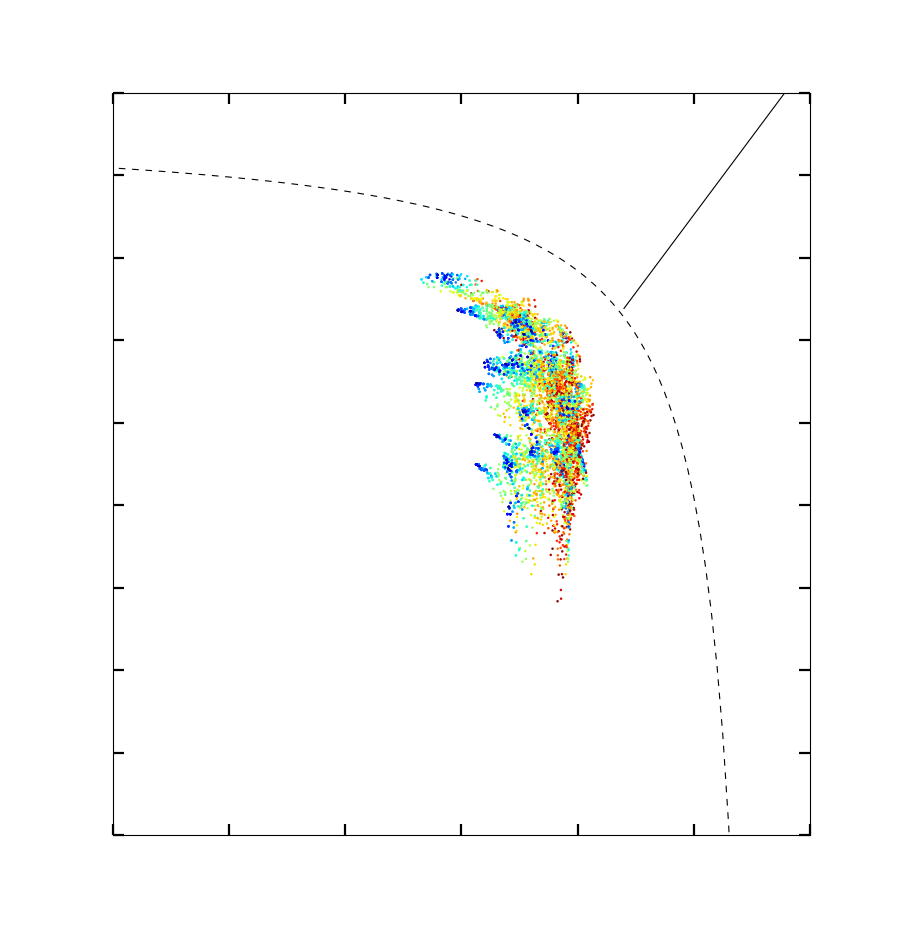

In [136]:
%matplotlib nbagg
fig = plt.figure(figsize=(11.25,11.6))
ax1 = fig.add_subplot(111)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    length=10,
    width=2,
    top='on',         # ticks along the top edge are off
    labelbottom='off', # labels along the bottom edge are off
    labelleft='off') # labels along the bottom edge are off
cmin = 0
cmax = 100
#i=381
#for j in range(0,len(np.where((flux_tot > 4e-14) == True)[0])) :
#    print j
#    
#    col = np.zeros(len(np.where(grow == np.where((flux_tot > 4e-14) == True)[0][j]+1)[0]))
#    row = np.zeros(len(np.where(grow == np.where((flux_tot > 4e-14) == True)[0][j]+1)[0]))
#    
#    for i in range(0,len(np.where(grow == np.where((flux_tot > 4e-14) == True)[0][j]+1)[0])) : 
#    
#        col = np.where(grow == np.where((flux_tot > 4e-14) == True)[0][j]+1)[0][0:]
#        row = np.where(grow == np.where((flux_tot > 4e-14) == True)[0][j]+1)[1][0:]
#    
#    plt.scatter(fn2h[col,row], fo3h[col,row], marker='.', c=d[col,row], linewidths = 0.25, alpha = 0.50)
#

#for i in range(302,303) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
#    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 0.25)
#    plt.clim(cmin,cmax)



#for i in range(305,306) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
#    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
#    plt.clim(cmin,cmax)
    
    
#for i in range(106,107) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
#    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 0.25)
#    plt.clim(cmin,cmax)
    
#for i in range(178,179) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
##    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
 #   plt.clim(cmin,cmax)
    
    
#for i in range(248,249) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
#    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
#    plt.clim(cmin,cmax)
    
#plt.scatter(fn2h[(grow == 4210) & (d < mm)], fo3h[(grow == 4210) & (d < mm)], marker='.', c=d[(grow == 4210) & (d < mm)], linewidths = 0.0, alpha = 1)
#plt.clim(cmin,cmax)
m = 3e-14
#mm=150
#
#for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
##for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
#    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
#    plt.clim(cmin,cmax)
#    
#mm=125
#
#for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
##for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
#    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
#    plt.clim(cmin,cmax)
#
mm=100

for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
    plt.clim(cmin,cmax)
    
mm = 75

for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
    plt.scatter(fs2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
    plt.clim(cmin,cmax)

mm=50

for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
    plt.scatter(fs2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
    plt.clim(cmin,cmax)
    
mm=25

for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
    plt.scatter(fs2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
    plt.clim(cmin,cmax)

    
mm=15

for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
    plt.scatter(fs2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
    plt.clim(cmin,cmax)
    
    
mm=5

for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
    plt.scatter(fs2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
    plt.clim(cmin,cmax)
    
    
# Show the boundary between the regions:
# Show the boundary between the regions:
plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')  

#cbar=plt.colorbar(ticks=[0,25,50,75,100,125,150,175,200],pad=0.05)
#cbar.set_label('$\mathrm{Angular\,\,distance\,\,from\,\,the\,\,peak\,\,[pc]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
#plt.xlabel('$\mathrm{log\,\,([SII]\lambda6716,6731\,/\,H}$'+r'$\mathrm{\alpha)}$', fontsize=16, fontname = 'Helvetica')
#plt.ylabel('$\mathrm{log\,\,([OIII]\lambda5007\,/\,H}$'+r'$\mathrm{\beta)}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(-2.5,0.5)
plt.ylim(-3,1.5)
plt.show()

In [137]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_BPT_flux_SII_reg_t.png', transparent=False, bbox_inches='tight', pad_inches=0.0)

<IPython.core.display.Javascript object>


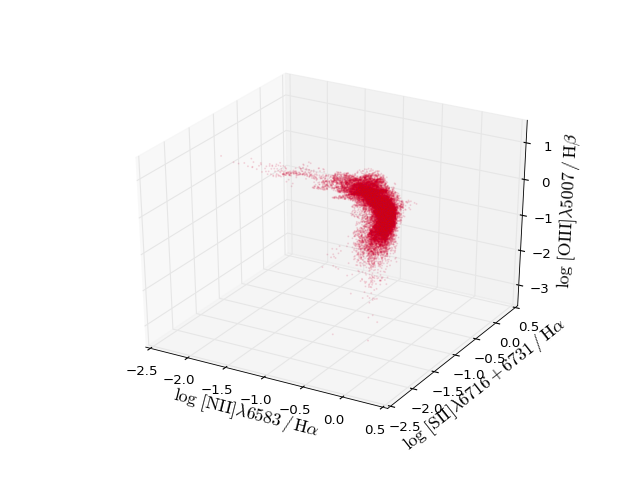

(-2.5, 0.5)

In [17]:
fffs2h = np.array(len(n2h[(n2h > -3) & (o3h > -5)]) & (fn2h < 500) & (fo3h < 500))

fffs2h = fs2h[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)]
l = 2e-17
tffn2h = np.array(len(n2h[(n2h > -3) & (o3h > -5) & (fn2h < 500) & (fo3h < 500) & (aimage_dataha > l)]))
tfffs2h = np.array(len(s2h[(n2h > -3) & (o3h > -5) & (fn2h < 500) & (fo3h < 500) & (aimage_dataha > l)]))
tffo3h = np.array(len(o3h[(n2h > -3) & (o3h > -5) & (fn2h < 500) & (fo3h < 500) & (aimage_dataha > l)]))
tfffs2h = fs2h[(n2h > -3) & (o3h > -5) & (fn2h < 500) & (fo3h < 500) & (aimage_dataha > l)]
tffn2h = fn2h[(n2h > -3) & (o3h > -5) & (fn2h < 500) & (fo3h < 500) & (aimage_dataha > l)]
tffo3h = fo3h[(n2h > -3) & (o3h > -5) & (fn2h < 500) & (fo3h < 500) & (aimage_dataha > l)]

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
g=1
b=10
ccolor=['r','orange','y','g','b','purple','k']
#for i in range(0,6):
#    color=ccolor[i]
ax.scatter(tffn2h,tfffs2h, \
               tffo3h, color = 'r', marker='.', s = 3, alpha=0.1)

ax.set_xlabel('$\mathrm{log\,\,[NII]\lambda6583\,/\,H}$'+r'$\mathrm{\alpha}$', fontsize=16, fontname = 'Helvetica')
ax.set_zlabel('$\mathrm{log\,\,[OIII]\lambda5007\,/\,H}$'+r'$\mathrm{\beta}$', fontsize=16, fontname = 'Helvetica')
ax.set_ylabel('$\mathrm{log\,\,[SII]\lambda6716+6731\,/\,H}$'+r'$\mathrm{\alpha}$', fontsize=16, fontname = 'Helvetica')

ax.set_xlim([-2.5,0.5])
ax.set_zlim([-3.5,1.5])
ax.set_ylim([-2.5,0.5])


<IPython.core.display.Javascript object>


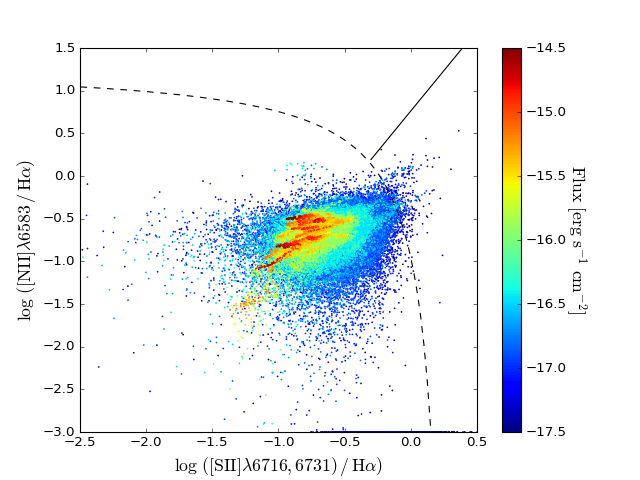

In [61]:
%matplotlib nbagg

cmin = -17.5
cmax = -14.5
plt.scatter(ffs2h[(np.log10(fflus) < -17.5) & (np.log10(fflus) > -18)], ffn2hs[(np.log10(fflus) < -17.5) & (np.log10(fflus) > -18)], marker='.', c=np.log10(fflus[(np.log10(fflus) < -17.5) & (np.log10(fflus) > -18)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffs2h[(np.log10(fflus) < -17) & (np.log10(fflus) > -17.5)], ffn2hs[(np.log10(fflus) < -17) & (np.log10(fflus) > -17.5)], marker='.', c=np.log10(fflus[(np.log10(fflus) < -17) & (np.log10(fflus) > -17.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffs2h[(np.log10(fflus) < -16.5) & (np.log10(fflus) > -17)], ffn2hs[(np.log10(fflus) < -16.5) & (np.log10(fflus) > -17)], marker='.', c=np.log10(fflus[(np.log10(fflus) < -16.5) & (np.log10(fflus) > -17)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffs2h[(np.log10(fflus) < -16) & (np.log10(fflus) > -16.5)], ffn2hs[(np.log10(fflus) < -16) & (np.log10(fflus) > -16.5)], marker='.', c=np.log10(fflus[(np.log10(fflus) < -16) & (np.log10(fflus) > -16.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffs2h[(np.log10(fflus) < -15.5) & (np.log10(fflus) > -16)], ffn2hs[(np.log10(fflus) < -15.5) & (np.log10(fflus) > -16)], marker='.', c=np.log10(fflus[(np.log10(fflus) < -15.5) & (np.log10(fflus) > -16)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffs2h[(np.log10(fflus) < -15) & (np.log10(fflus) > -15.5)], ffn2hs[(np.log10(fflus) < -15) & (np.log10(fflus) > -15.5)], marker='.', c=np.log10(fflus[(np.log10(fflus) < -15) & (np.log10(fflus) > -15.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffs2h[(np.log10(fflus) > -15)], ffn2hs[(np.log10(fflus) > -15)], marker='.', c=np.log10(fflus[(np.log10(fflus) > -15)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')    

cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.05)
cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)

plt.xlabel('$\mathrm{log\,\,([SII]\lambda6716,6731)\,/\,H}$'+r'$\mathrm{\alpha)}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,([NII]\lambda6583\,/\,H}$'+r'$\mathrm{\alpha)}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(-2.5,0.5)
plt.ylim(-3,1.5)
plt.show()    

In [62]:
# Read Fits Data and Data Header

ahdu_list222 = fits.open('NGC628_SN1_1.0.LineMaps.map.3727.flux.extcor.clean.int33.fits')
ahdu_list222.info()
aimage_datao2 = ahdu_list222[0].data
ahdu_list222.close()

ahdu_list333 = fits.open('NGC628_SN2_1.0.LineMaps.map.4861.flux.extcor.clean.int33.fits')
ahdu_list333.info()
aimage_datahbe = ahdu_list333[0].data
ahdu_list333.close()

                    
aimage_datahbe[np.where(aimage_datahbe < 0)] = 0
aimage_datao2[np.where(aimage_datao2 < 0)] = 0
                       
image_data = ((aimage_datao2)/(aimage_datahbe))
#image_data[(aimage_dataha >= 1.2e-18) & (image_data == 0)] = 0.001
image_data = np.log10(image_data)
#image_data[np.where(aimage_dataha < 1.2e-18)] = 500
image_data[np.where(np.isfinite(image_data) == False)] = 500
image_data[np.where(image_s == 1)] = 500
image_data[np.where(image_data == 0)] = 500
o2h = image_data

Filename: NGC628_SN1_1.0.LineMaps.map.3727.flux.extcor.clean.int33.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float64   
Filename: NGC628_SN2_1.0.LineMaps.map.4861.flux.extcor.clean.int33.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float64   


In [63]:
fo2h = deepcopy(o2h)
fo2h[(aimage_datao2 < 1.2e-18) & (aimage_datahbe < 0.6e-18)] = -5
fo2h[(fo2h == 0)] = -5

ffo2h = np.array(len(o2h[(o2h > -5) & (o3h > -5)]) & (fo2h < 500) & (fo3h < 500))
ffo3ho = np.array(len(o2h[(o2h > -3) & (o3h > -5)]) & (fo2h < 500) & (fo3h < 500))
ffn2ho2 = np.array(len(o2h[(o2h > -3) & (o3h > -5)]) & (fo2h < 500) & (fo3h < 500))
rro = np.array(len(o2h[(o2h > -3) & (o3h > -5)]) & (fo2h < 500) & (fo3h < 500))
ddd = np.array(len(o2h[(o2h > -3) & (o3h > -5)]) & (fo2h < 500) & (fo3h < 500))
ffn2ho2 = fn2h[(fo2h > -3) & (fo3h > -5) &(fo2h < 500) & (fo3h < 500)]

ffo2h = fo2h[(fo2h > -3) & (fo3h > -5) &(fo2h < 500) & (fo3h < 500)]
ffo3ho = fo3h[(fo2h > -3) & (fo3h > -5) &(fo2h < 500) & (fo3h < 500)]
ddd = d[(fo2h > -3) & (fo3h > -5) &(fo2h < 500) & (fo3h < 500)]
rro = ra[(fo2h > -3) & (fo3h > -5) &(fo2h < 500) & (fo3h < 500)]

fluo = (1.20671*10*aimage_dataha[(fo2h > -3) & (fo3h > -5) &(fo2h < 500) & (fo3h < 500)]*\
    fimage_dataha[(fo2h > -3) & (fo3h > -5) &(fo2h < 500) & (fo3h < 500)])
ffluo = fluo - grow2[(fo2h > -3) & (fo3h > -5) &(fo2h < 500) & (fo3h < 500)]

#fffffo3hs = deepcopy(ffo3hs)
#fffffs2h = deepcopy(ffs2h)
#for i in range(0,1000) :
#    fffffo3hs[i]=0.6
#    fffffs2h[i]=-2.5
#for i in range(1000,2000) :
#    fffffo3hs[i]=-1.5
#    fffffs2h[i]=-0.6
#for i in range(2000,4000) :
#    fffffo3hs[i]=-2.36
#    fffffs2h[i]=-0.58
#
#for i in range(4000,6000) :
#    fffffo3hs[i]=-3
#    fffffs2h[i]=-0.65


#ys=np.polyfit(fffffo3hs[(dd < 150) & (ffs2h < 0) & (ffs2h > -3) & (ffo3hs < 1) & (ffo3hs > -5)& (np.log10(fflus) > -15.87)],fffffs2h[(dd < 150) & (ffs2h <0) & (ffs2h > -3) & (ffo3hs <1) & (ffo3hs > -5)& (np.log10(fflus) > -15.87)],4)
#print ys
#yys = np.poly1d(ys)
#print yys


<IPython.core.display.Javascript object>


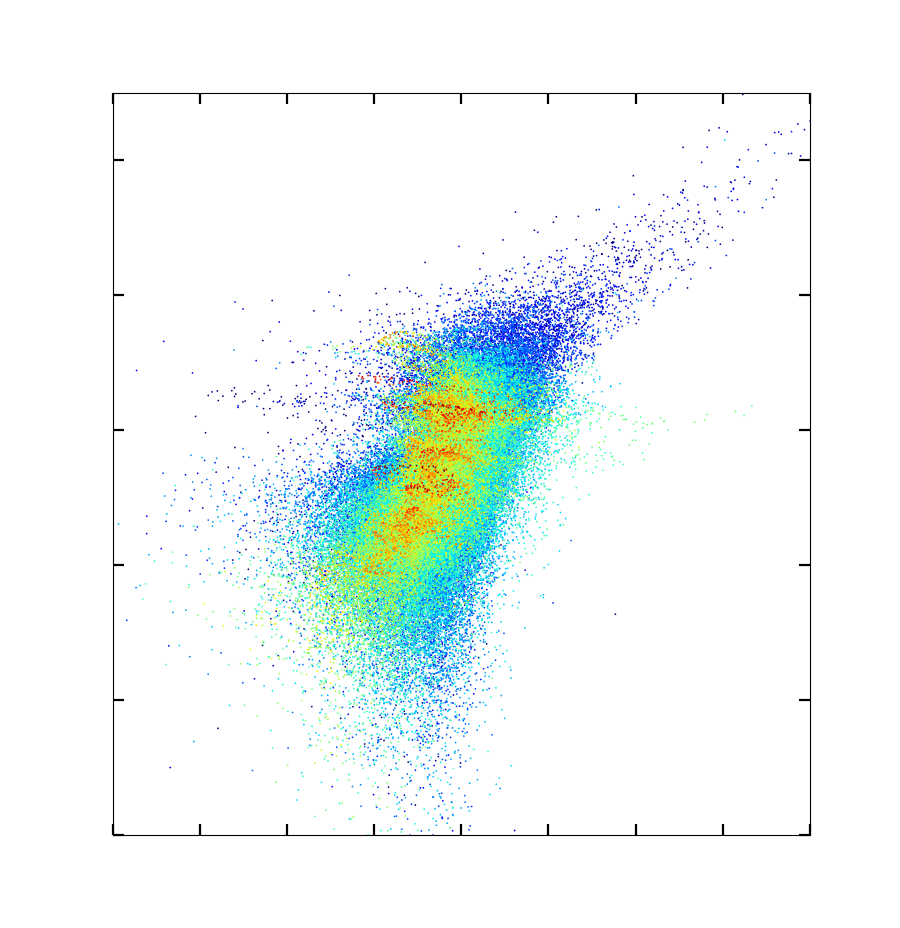

In [22]:
%matplotlib nbagg
fig = plt.figure(figsize=(11.25,11.6))
ax1 = fig.add_subplot(111)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    length=10,
    width=2,
    top='on',         # ticks along the top edge are off
    labelbottom='off', # labels along the bottom edge are off
    labelleft='off') # labels along the bottom edge are off
cmin = -17.5
cmax = -14.5
plt.scatter(ffo2h[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)], ffo3ho[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)], marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffo2h[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)], ffo3ho[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)], marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffo2h[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)], ffo3ho[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)], marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffo2h[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)], ffo3ho[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)], marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffo2h[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)], ffo3ho[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)], marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffo2h[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)], ffo3ho[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)], marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffo2h[(np.log10(ffluo) > -15)], ffo3ho[(np.log10(ffluo) > -15)], marker='.', c=np.log10(ffluo[(np.log10(ffluo) > -15)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
#plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
#plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')    

#cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.05)
#cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)

#plt.xlabel('$\mathrm{log\,\,[OII]\lambda3727\,/\,H}$'+r'$\mathrm{\beta}$', fontsize=16, fontname = 'Helvetica')
#plt.ylabel('$\mathrm{log\,\,[OIII]\lambda5007\,/\,H}$'+r'$\mathrm{\beta}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(-1.5,2.5)
plt.ylim(-3,2.5)
plt.show()    

In [21]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_BPT_flux_OII_tt.pdf', transparent=False, bbox_inches='tight', pad_inches=0.04)

<IPython.core.display.Javascript object>


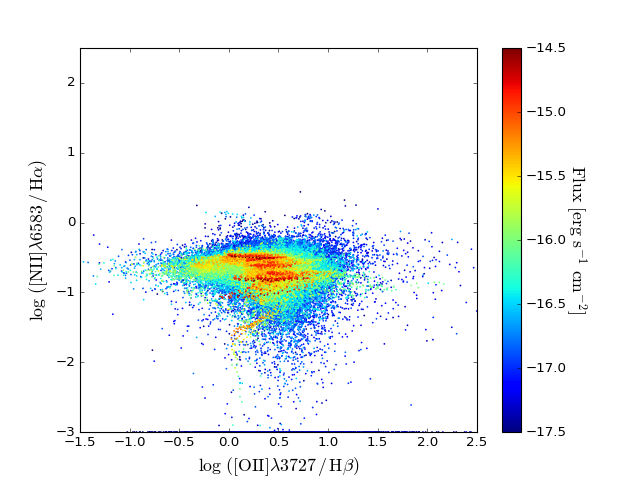

In [64]:
%matplotlib nbagg

cmin = -17.5
cmax = -14.5
plt.scatter(ffo2h[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)], ffn2ho2[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)], marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffo2h[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)], ffn2ho2[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)], marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffo2h[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)], ffn2ho2[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)], marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffo2h[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)], ffn2ho2[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)], marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffo2h[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)], ffn2ho2[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)], marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffo2h[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)], ffn2ho2[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)], marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(ffo2h[(np.log10(ffluo) > -15)], ffn2ho2[(np.log10(ffluo) > -15)], marker='.', c=np.log10(ffluo[(np.log10(ffluo) > -15)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
#plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
#plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')    

cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.05)
cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)

plt.xlabel('$\mathrm{log\,\,([OII]\lambda3727\,/\,H}$'+r'$\mathrm{\beta)}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,([NII]\lambda6583\,/\,H}$'+r'$\mathrm{\alpha)}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(-1.5,2.5)
plt.ylim(-3,2.5)
plt.show()    

<IPython.core.display.Javascript object>


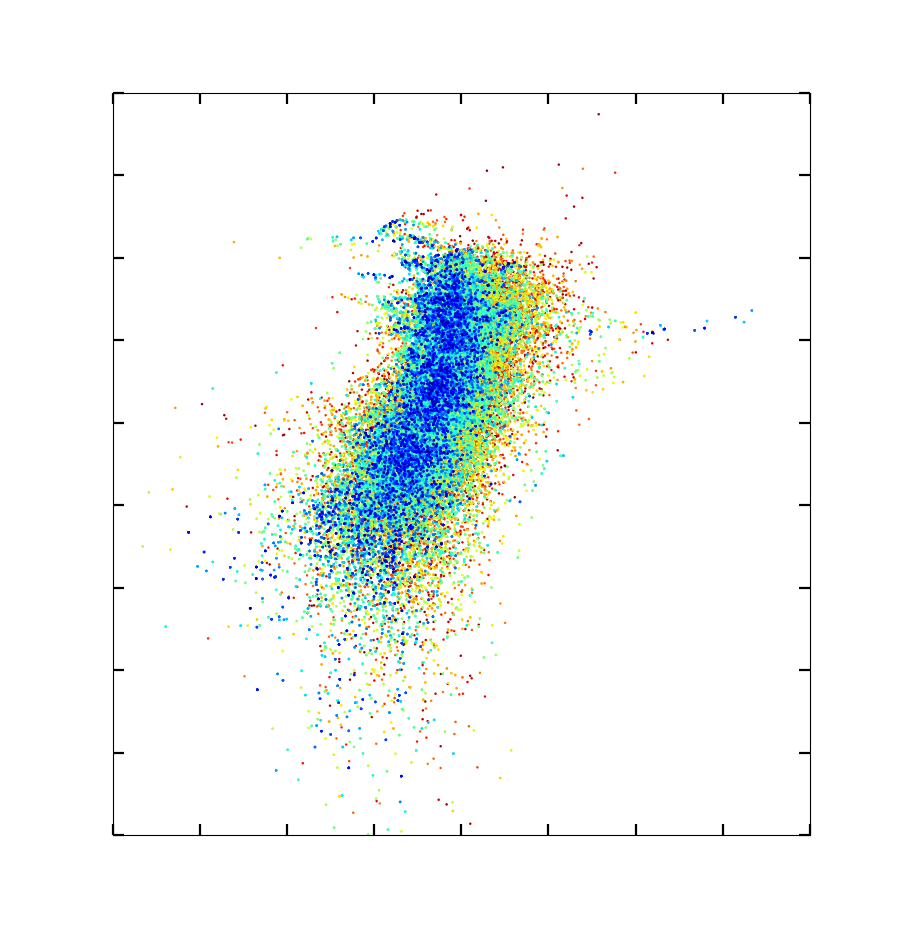

In [29]:
%matplotlib nbagg
fig = plt.figure(figsize=(11.25,11.6))
ax1 = fig.add_subplot(111)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    length=10,
    width=2,
    top='on',         # ticks along the top edge are off
    labelbottom='off', # labels along the bottom edge are off
    labelleft='off') # labels along the bottom edge are off
cmin = 0
cmax = 100
#i=381
#for j in range(0,len(np.where((flux_tot > 4e-14) == True)[0])) :
#    print j
#    
#    col = np.zeros(len(np.where(grow == np.where((flux_tot > 4e-14) == True)[0][j]+1)[0]))
#    row = np.zeros(len(np.where(grow == np.where((flux_tot > 4e-14) == True)[0][j]+1)[0]))
#    
#    for i in range(0,len(np.where(grow == np.where((flux_tot > 4e-14) == True)[0][j]+1)[0])) : 
#    
#        col = np.where(grow == np.where((flux_tot > 4e-14) == True)[0][j]+1)[0][0:]
#        row = np.where(grow == np.where((flux_tot > 4e-14) == True)[0][j]+1)[1][0:]
#    
#    plt.scatter(fn2h[col,row], fo3h[col,row], marker='.', c=d[col,row], linewidths = 0.25, alpha = 0.50)
#

#for i in range(302,303) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
#    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 0.25)
#    plt.clim(cmin,cmax)



#for i in range(305,306) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
#    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
#    plt.clim(cmin,cmax)
    
    
#for i in range(106,107) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
#    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 0.25)
#    plt.clim(cmin,cmax)
    
#for i in range(178,179) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
##    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
 #   plt.clim(cmin,cmax)
    
    
#for i in range(248,249) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
#    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
#    plt.clim(cmin,cmax)
    
#plt.scatter(fn2h[(grow == 4210) & (d < mm)], fo3h[(grow == 4210) & (d < mm)], marker='.', c=d[(grow == 4210) & (d < mm)], linewidths = 0.0, alpha = 1)
#plt.clim(cmin,cmax)
m = 5e-15
#mm=150
#
#for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
##for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
#    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
#    plt.clim(cmin,cmax)
#    
#m=125
#
#for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
##for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
#    plt.scatter(fn2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
#    plt.clim(cmin,cmax)

mm=100

for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
    plt.scatter(fo2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
    plt.clim(cmin,cmax)
    
mm = 75

for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
    plt.scatter(fo2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
    plt.clim(cmin,cmax)

mm=50

for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
    plt.scatter(fo2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
    plt.clim(cmin,cmax)
    
mm=25

for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
    plt.scatter(fo2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
    plt.clim(cmin,cmax)

    
mm=15

for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
    plt.scatter(fo2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
    plt.clim(cmin,cmax)
    
    
mm=5

for i in range(0,len(np.where((flux_tot > m) == True)[0])) :
#for i in range(0,len(np.where((flux_tot > m) == True)[0][0:])) :
    plt.scatter(fo2h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], fo3h[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], marker='.', c=d[(grow == np.where((flux_tot > m) == True)[0][i]+1) & (d < mm)], linewidths = 0.0, alpha = 1)
    plt.clim(cmin,cmax)
    
    
# Show the boundary between the regions:
#plt.plot(np.arange(160.)/40-3, 0.61/(np.arange(160.)/40-3.05) + 1.3, linestyle='--', c='k')
#plt.plot(np.arange(135.)/40-3, 0.61/(np.arange(135.)/40-3.47) + 1.19, c='k')
#plt.plot(yy(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')

#plt.plot(np.arange(105.)/40-3, 0.15/(np.arange(105.)/40-2.6) + 0.55, c='k')

#cbar=plt.colorbar(ticks=[0,25,50,75,100,125,150,175,200],pad=0.05)
#cbar.set_label('$\mathrm{Angular\,\,distance\,\,from\,\,the\,\,peak\,\,[pc]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
#plt.xlabel('$\mathrm{log\,\,[OII]\lambda3727\,/\,H}$'+r'$\mathrm{\beta}$', fontsize=16, fontname = 'Helvetica')
#plt.ylabel('$\mathrm{log\,\,[OIII]\lambda5007\,/\,H}$'+r'$\mathrm{\beta}$', fontsize=16, fontname = 'Helvetica')
#plt.plot(yy(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')
plt.xlim(-1.5,2.5)
plt.ylim(-3,1.5)
plt.show()

In [31]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_BPT_flux_OII_peak_t.png', transparent=False, bbox_inches='tight', pad_inches=0.0)

In [ ]:
print 'toto'

130393
130393
130393


<IPython.core.display.Javascript object>


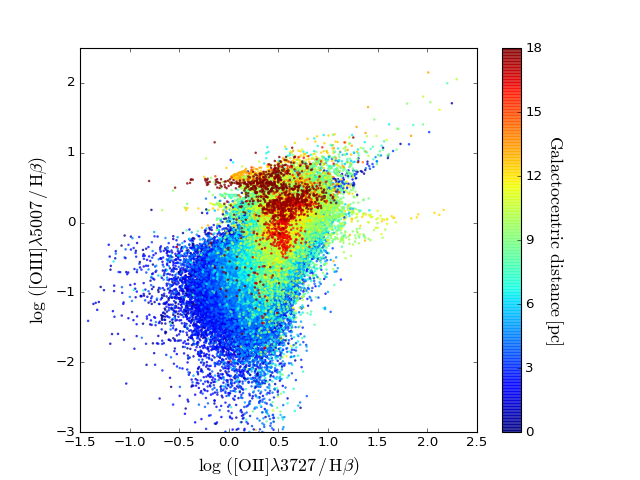

In [65]:
%matplotlib nbagg

h=1e-17
print len(ffo2h[(ddd < 150) & (ffluo > h)])
print len(ffo3ho[(ddd < 150) & (ffluo > h)])
print len(rro[(ddd < 150) & (ffluo > h)])

plt.scatter(ffo2h[(ddd < 150) & (ffluo > h)], ffo3ho[(ddd < 150) & (ffluo > h)], marker='.', c=rro[(ddd < 150) & (ffluo > h)]/1000, linewidths = 0.0, alpha = 0.80)
# Show the boundary between the regions:
#plt.plot(np.arange(160.)/40-3, 0.61/(np.arange(160.)/40-3.05) + 1.3, linestyle='--', c='k')
#plt.plot(np.arange(135.)/40-3, 0.61/(np.arange(135.)/40-3.47) + 1.19, c='k')


cbar=plt.colorbar(ticks=[0,3,6,9,12,15,18],pad=0.05)
cbar.set_label('$\mathrm{Galactocentric\,\,distance\,[pc]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(0,18)

plt.xlabel('$\mathrm{log\,\,([OII]\lambda3727\,/\,H}$'+r'$\mathrm{\beta)}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,([OIII]\lambda5007\,/\,H}$'+r'$\mathrm{\beta)}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(-1.5,2.5)
plt.ylim(-3,2.5)
plt.show()

In [67]:
fit = np.polyfit(rro[(np.log10(ffluo) > -16)]/1000, ffo2h[(np.log10(ffluo) > -16)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) > -16)])*2.87),4)
print fit
fitt = np.poly1d(fit)
print fitt

[ -5.85823699e-06  -1.66936095e-04   4.08402185e-03   8.02186276e-02
  -8.91089388e-02]
            4             3            2
-5.858e-06 x - 0.0001669 x + 0.004084 x + 0.08022 x - 0.08911


<IPython.core.display.Javascript object>


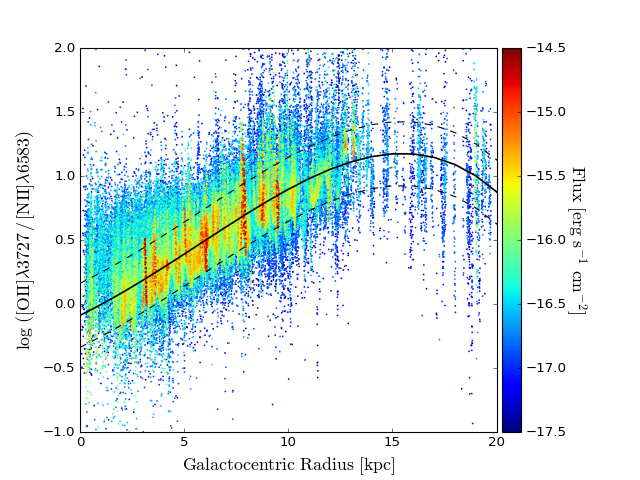

In [68]:
%matplotlib nbagg

cmin = -17.5
cmax = -14.5
plt.scatter(rro[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)]/1000, ffo2h[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)])*2.87), marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rro[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)]/1000, ffo2h[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rro[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)]/1000, ffo2h[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rro[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)]/1000, ffo2h[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rro[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)]/1000, ffo2h[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rro[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)]/1000, ffo2h[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rro[(np.log10(ffluo) > -15)]/1000, ffo2h[(np.log10(ffluo) > -15)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) > -15)])*2.87), marker='.', c=np.log10(ffluo[(np.log10(ffluo) > -15)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
#plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
#plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')    

cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.01)
cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
plt.plot(np.arange(25),fitt(np.arange(25))+0.25, '--k')
plt.plot(np.arange(25),fitt(np.arange(25))-0.25, '--k')

plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,([OII]\lambda3727\,/\,[NII]\lambda6583)}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(-1,2)
plt.show()    

In [61]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_OIINII_rayon.pdf', transparent=True, bbox_inches='tight', pad_inches=0.04)